In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# Format the any numpy array to 3 decimal points
np.set_printoptions(formatter={'float':"{0:0.3f}".format})

In [2]:
file = 'Test_data_2017.csv'
df = pd.read_csv(file)


# Multiple Linear Regression

Multiple linear regression simply means that you have more than one feature variable.

Note: The weights are how important each feature is to the equation. This is the part that the algorithm has to learn.

The generic formula is:

$Y_i = Bias_0 + Weight_1 Feature_1 + Weight_2 Feature_2 + \ldots + Weight_p Feature_p$



In [3]:
df.head()

,Country_name,year,Life_Ladder,Log_GDP_percapita,Social_support,Healthy _life_expectancy_at_birth,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Positive_affect,Negative_affect
0,Afghanistan,2017,2.662,7.697,0.491,52.8,0.427,-0.121,0.954,0.496,0.371
1,Albania,2017,4.640,9.476,0.638,68.4,0.750,-0.029,0.876,0.669,0.334
2,Algeria,2017,5.249,9.354,0.807,65.7,0.437,-0.167,0.700,0.642,0.289
3,Argentina,2017,6.039,10.067,0.907,68.6,0.832,-0.186,0.841,0.809,0.292
4,Armenia,2017,4.288,9.402,0.698,66.6,0.614,-0.147,0.865,0.625,0.437


In [4]:
df.count()

Country_name                         147
year                                 147
Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

In [5]:
clean_data = df.drop(columns=['Country_name', 'year'])

In [6]:
clean_data.count()

Life_Ladder                          147
Log_GDP_percapita                    147
Social_support                       147
Healthy _life_expectancy_at_birth    147
Freedom_to_make_life_choices         147
Generosity                           147
Perceptions_of_corruption            147
Positive_affect                      147
Negative_affect                      147
dtype: int64

#### Define Features, Target
#### Split Data into Training & Test
#### Fit the model

In [7]:
X = clean_data.drop(columns='Life_Ladder', axis=1)
y= clean_data['Life_Ladder']

In [12]:
from sklearn.model_selection import train_test_split
from collections import Counter
#75% of data is for training the dataset, & 25% is for testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)
#Counter(y_train)

### Implement a linear model:

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Fitting our model with all our features in X
model.fit(X_train, y_train)


LinearRegression()

#### Model equation $y_i = \beta_0 + \beta_1x_{i1} + \beta_2 x_{i2} + \ldots + \beta_p x_{ip} + \epsilon $
#### $y_i = dependent variable $
#### $x_i = expanatory variables $
#### $\beta_0 = y-intercept $
#### $\beta_p = slope coefficient for each explanatory variable $
#### $\epsilon = the models error term (also known as residuals $

 source: https://www.c-sharpcorner.com/article/multiple-linear-regression/

In [15]:
print("Intercept: ", model.intercept_)
print("Coefficients:")
list(zip(X, model.coef_))

Intercept:  -3.4071360407953417
Coefficients:


[('Log_GDP_percapita', 0.3181885725907439),
 ('Social_support', 2.3677372038987357),
 ('Healthy _life_expectancy_at_birth', 0.034190225176001135),
 ('Freedom_to_make_life_choices', 0.9312771201323474),
 ('Generosity', 0.7320881689095489),
 ('Perceptions_of_corruption', -0.31803401517632335),
 ('Positive_affect', 1.3287232523438437),
 ('Negative_affect', 1.0836885403135703)]

##### Regression Equation: 
 Happiness_Ladder = -3.41 +(0.32*Log_GDP_percapita)+(2.37*Social_support)+(0.034*Healthy _life_expectancy_at_birth)+ (0.93*Freedom_to_make_life_choices)+(0.73*Generosity)+(-0.32*Perceptions_of_corruption)+(1.33*Positive_affect)+(1.08*Negative_affect) + e

In [19]:
y_pred = model.predict(X_test)
print("Prediction for test set: {}".format(y_pred))

Prediction for test set: [5.166 5.023 7.028 6.229 4.550 4.145 4.610 5.647 4.628 7.110 7.014 5.665
 5.576 5.155 4.892 7.049 4.958 6.383 5.785 5.818 6.000 6.010 6.283 4.553
 5.645 5.335 5.651 5.638 5.712 6.027 7.036 4.493 5.077 6.766 3.822 6.826
 5.726]


In [31]:
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)
results.head()

,Prediction,Actual
0,5.166230,5.234
1,5.022636,4.737
2,7.027508,7.476
3,6.228747,6.568
4,4.549627,5.322


#### Model Evaluation:

In [21]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('R-squared: (R2) {:.3f}'.format(model.score(X,y)*100))
print('Mean Absolute Error: {:.3f}'.format(meanAbErr))
print('Mean Square Error:(MSE) {:.3f}'.format(meanSqErr))
print('Root Mean Square Error:{:.3f}'.format(rootMeanSqErr))
print('Model Intercept:{:.3f}'.format(model.intercept_))
print('Model coefficients:', model.coef_)

R-squared: (R2) 76.099
Mean Absolute Error: 0.425
Mean Square Error:(MSE) 0.283
Root Mean Square Error:0.532
Model Intercept:-3.407
Model coefficients: [0.318 2.368 0.034 0.931 0.732 -0.318 1.329 1.084]


## Result interpretation:
#### <ins><b> R squared:</b></ins> Coefficient of determination: Shows how many points fall on the regression line. Here the value is 75.90%
#### <ins><b> Mean Absolute Error:</b></ins> Absolute difference between the actual and the predicted values, 0.44 is close to 0, which is good
#### <ins><b> Mean Square Error:</b></ins> descibes how close a regression line is to a set of points, by taking the distances from the point to the regression line and squaring them, 0.32 is close to 0, which indicates the model performance is good

#### <ins><b> Root Mean Square Error:</b></ins> is an applied measure of the differences between numbers(population values and samples) which is predicted by an estimator. It describes the sample standard deviation of the differences between the predicted and observed values. 0.57 means that the model's performance is good


## Residuals

Because we can't easily plot our line in 3D space, we can use a residual plot to check our predictions.

Residuals are the difference between the true values of y and the predicted values of y.

Source: [Interpreting Residual Plots](http://docs.statwing.com/interpreting-residual-plots-to-improve-your-regression/)

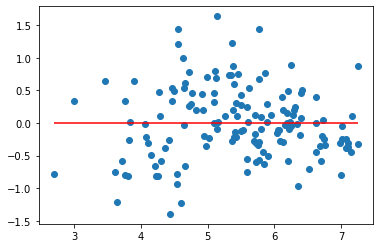

In [40]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max(), color='red')
plt.show()

We want our predictions to be close to zero on the y-axis in this plot.

### Try the model with real input data to predict the Life_Ladder score:

In [34]:
# Format the any numpy array to 3 decimal points
np.set_printoptions(formatter={'float':"{0:0.3f}".format})

# Try the model with feature values where we know the output
user_input=np.array([7.647,0.539,51.6,0.6,0.121,0.707,0.618,0.275])

user_input=user_input.reshape(1,-1)

In [35]:
user_input.shape

(1, 8)

In [36]:
user_predict=model.predict(user_input)
user_predict

array([3.608])

In [38]:
# checking the model against a Life_Ladder score that is known:
print(f'The real Life_Ladder is 4.758, compared to the predicted Life_Ladder: {user_predict}')

The real Life_Ladder is 4.758, compared to the predicted Life_Ladder: [3.608]
